In [160]:
import pandas as pd
import numpy as np

In [168]:
df=pd.read_csv("Iris.csv")

In [170]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [172]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [174]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [176]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [180]:
df.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [182]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

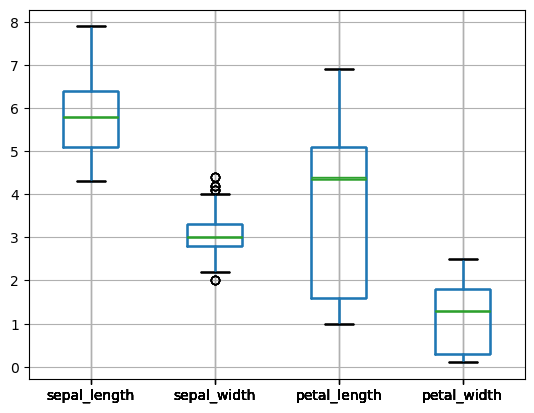

In [192]:
df.boxplot()
plt.show()

In [194]:
Q1=df['sepal_width'].quantile(0.25)
Q3=df['sepal_width'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(f'Q1={Q1}, Q3={Q3}, IQR={IQR}, lower_limit={lower_limit}, upper_limit={upper_limit}')

Q1=2.8, Q3=3.3, IQR=0.5, lower_limit=2.05, upper_limit=4.05


In [196]:
outliers=[]
for i in df.sepal_width:
    if i<lower_limit or i>upper_limit:
        outliers.append(i)
print("outliers are",outliers)   

outliers are [4.4, 4.1, 4.2, 2.0]


In [198]:
upper_limit

4.05

In [200]:
lower_limit

2.05

In [202]:
df[df.sepal_width<lower_limit].index

Index([60], dtype='int64')

In [204]:
df1 = df[(df.sepal_width<lower_limit) | (df.sepal_width>upper_limit)].index
df2=df.drop(df1)

In [206]:
df2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


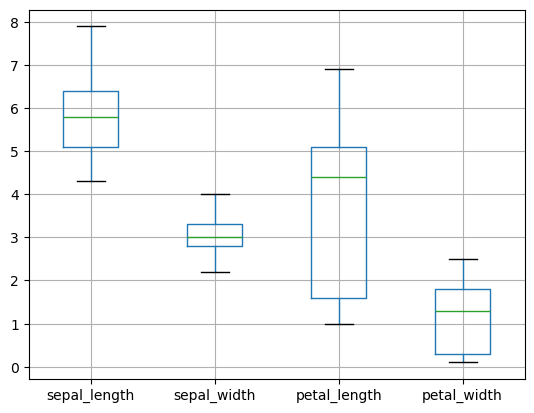

In [208]:
df2.boxplot()
plt.show()

In [210]:
outliers=[]
for i in df2.sepal_width:
    if i<lower_limit or i>upper_limit:
        outliers.append(i)
print("outliers are",outliers)   

outliers are []


In [212]:
X = df2.drop(['species'], axis = 1)
Y = df2['species']

In [214]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size =0.2,random_state = 0)

In [216]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(xtrain, ytrain)

GaussianNB()

In [218]:
y_pred = gaussian.predict(xtest)

In [220]:
print(xtrain)
print("------------\n")
print(xtest)
print("------------\n")
print(ytrain)
print("------------\n")
print(ytest)
print("------------\n")
print(y_pred)

     sepal_length  sepal_width  petal_length  petal_width
80            5.5          2.4           3.8          1.1
19            5.1          3.8           1.5          0.3
48            5.3          3.7           1.5          0.2
53            5.5          2.3           4.0          1.3
47            4.6          3.2           1.4          0.2
..            ...          ...           ...          ...
9             4.9          3.1           1.5          0.1
107           7.3          2.9           6.3          1.8
71            6.1          2.8           4.0          1.3
121           5.6          2.8           4.9          2.0
50            7.0          3.2           4.7          1.4

[116 rows x 4 columns]
------------

     sepal_length  sepal_width  petal_length  petal_width
7             5.0          3.4           1.5          0.2
25            5.0          3.0           1.6          0.2
28            5.2          3.4           1.4          0.2
123           6.3          2.7    

In [222]:
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score,recall_score,classification_report

In [226]:
cm= confusion_matrix(ytest, y_pred)
cm

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  8]], dtype=int64)

In [224]:
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.9666666666666667


In [234]:
error_rate = 1- accuracy_score(ytest, y_pred)
error_rate

0.033333333333333326

In [232]:
ps = precision_score(ytest, y_pred, average='micro')
ps

0.9666666666666667

In [230]:
rs = recall_score(ytest, y_pred, average='micro')
rs

0.9666666666666667

In [228]:
print("classification report: ",classification_report(ytest, y_pred))

classification report:                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [240]:
from sklearn.naive_bayes import BernoulliNB
bernoulli = BernoulliNB()
bernoulli.fit(xtrain, ytrain)

BernoulliNB()

In [242]:
ypred = bernoulli.predict(xtest)

In [244]:
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.9666666666666667


In [246]:
cm= confusion_matrix(ytest, y_pred)
cm

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  8]], dtype=int64)

In [73]:
print("classification report: ",classification_report(ytest, y_pred))

classification report:                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [75]:
rs = recall_score(ytest, y_pred, average='micro')
rs

0.9666666666666667

In [77]:
ps = precision_score(ytest, y_pred, average='micro')
ps

0.9666666666666667

In [79]:
error_rate = 1- accuracy_score(ytest, y_pred)
error_rate

0.033333333333333326

In [81]:
from sklearn.naive_bayes import MultinomialNB
multinomial = MultinomialNB()
multinomial.fit(xtrain, ytrain)

MultinomialNB()

In [83]:
ypred = multinomial.predict(xtest)

In [85]:
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.9666666666666667


In [87]:
cm= confusion_matrix(ytest, y_pred)
cm

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  8]], dtype=int64)

In [89]:
print("classification report: ",classification_report(ytest, y_pred))

classification report:                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [91]:
rs = recall_score(ytest, y_pred, average='micro')
rs

0.9666666666666667

In [93]:
ps = precision_score(ytest, y_pred, average='micro')
ps

0.9666666666666667

In [95]:
error_rate = 1- accuracy_score(ytest, y_pred)
error_rate

0.033333333333333326